In [1]:
import pandas as pd
import os
from ydata_profiling import ProfileReport
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

/Users/asadsabir/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/asadsabir/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


**<h3> List of Indicators used</h3>**

**<h4> Poverty </h4>**

1. Gini Index

2. Poverty Wealth Gap percentages below the following poverty lines
    * at $2.15 a day
    * at $3.65 a day
    * at $6.85 a day
    
3. Poverty Headcount percentages on the following poverty lines
    * at $2.15 a day
    * at $3.65 a day
    * at $6.85 a day

**<h4> Health </h4>**

4. Life Expectancy
5. Number of physicians per 1000 people
6. Number of hospital beds per 1000 people 
7. Cause of death (% of total)
    * by communicable diseases and maternal, prenatal and nutrition conditions
    * by non-communicable diseases
    * by injury
8. Diabetes prevalence (% of population ages 20 to 79)
9. Population ages 65 and above (% of total population)

**<h4>Education</h4>**

10. Percentage of population ages 25+ who have completed the following
    * Upper secondary
    * Short-cycle tertiary
    * primary
    * post-secondary
    * lower secondary
    * Atleast Master's or equivalent
    * Atleast Bachelor's or equivalent
    * Atleast Doctoral or equivalent

11. Number of Scientific and technical journal articles published

**<h4>Economy</h4>**

12. GDP (current USD)

13. Unemployment

14. Inflation



In [2]:
csv_paths = ['../data/raw/' + file for file in os.listdir('../data/raw/') if file.endswith('csv')] #read paths of all indicator csvs into list
df = None
flag = False

for path in csv_paths: 
    
    indicator_df = pd.read_csv(path,header=2).drop(['Unnamed: 67','Country Code','Indicator Code'],axis=1) #turn each indicator into dataframe  

    indicator_df = pd.melt(indicator_df,id_vars=['Country Name','Indicator Name'],value_name=indicator_df['Indicator Name'][0],var_name='Year').drop('Indicator Name',axis=1) #melt indicator into one column

    if flag:
        df = pd.merge(left=df,right=indicator_df,on=['Country Name','Year'],how='outer') #join with other indicators
    else:
        df = indicator_df
        flag = True

df.to_csv('../data/interim/merged_indicators.csv')

In [3]:
df.head() # each row represents a country at a year 

,Country Name,Year,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)",Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),"Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Inflation, consumer prices (annual %)",Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",Gini index,...,"Population, total",Population ages 65 and above (% of total population),"Cause of death, by non-communicable diseases (% of total)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Poverty gap at $6.85 a day (2017 PPP) (%),"Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)","Physicians (per 1,000 people)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)"
0,Aruba,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54608.0,2.373279,NaN,NaN,NaN,NaN,64.152000,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130692579.0,2.972568,NaN,NaN,NaN,1.966442,44.085552,NaN,NaN,NaN
2,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8622466.0,2.833029,NaN,NaN,NaN,0.170627,32.535000,0.035,NaN,NaN
3,Africa Western and Central,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97256290.0,3.301681,NaN,NaN,NaN,0.786057,37.845152,NaN,NaN,NaN
4,Angola,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5357195.0,3.080044,NaN,NaN,NaN,2.061462,38.211000,0.067,NaN,NaN


In [4]:
df.info() #looking at data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16758 entries, 0 to 16757
Data columns (total 29 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Country Name                                                                                             16758 non-null  object 
 1   Year                                                                                                     16758 non-null  object 
 2   Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)       1240 non-null   float64
 3   Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)                   325 non-null    float64
 4   Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)               

In [5]:
df['Country Name'] = df['Country Name'].astype('category')   #change country to category
df['Year'] =  df['Year'].astype('Int64')   #change year to int

In [6]:
df.shape #looking at number of rows

(16758, 29)

In [7]:
pd.Series([df[col].isna().sum()/len(df) for col in df.columns],index=df.columns).sort_values(ascending=False) # percentage of missing values for each column 

Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)                     0.980606
Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)            0.975892
Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)          0.968791
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)          0.947607
Cause of death, by injury (% of total)                                                                     0.944862
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)      0.944862
Cause of death, by non-communicable diseases (% of total)                                                  0.944862
Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)           0.940446
Educational attainment, at least completed short-cycle tertiary, populat

First drop rows with no Gini Index

In [8]:
from copy import deepcopy

gini = deepcopy(df[ ~df['Gini index'].isna()])

# percentage of missing values for each column
pd.Series([gini[col].isna().sum()/len(gini) for col in gini.columns],index=gini.columns).sort_values(ascending=False)  

Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)                     0.888946
Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)            0.863120
Cause of death, by injury (% of total)                                                                     0.854339
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)      0.854339
Cause of death, by non-communicable diseases (% of total)                                                  0.854339
Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)          0.843492
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)          0.788223
Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)           0.717975
Educational attainment, at least completed lower secondary, population 2

In [9]:
len(gini)

1936

* While the DataFrame is vast, covering over 60 years for about 200 countries, the data itself is sparse as many indicators are not measured every year for every country. The data is an amalgamation of indicators from different world organizations that measure different countries at different periodicities.
* To tackle the missing values issue, I'm first going to drop features that have high correlations with other features.
* You can see how I decided which features to drop, in the excel sheet at  *<span style='color:green;'>reports/figures/corr.xlsx</span>*
* I've highlighted cells with an r-squared stronger than 0.85 or -0.85
* For those cells I decided to keep the feature that either has a stronger correlation with Gini Index or less null values
* Even though all the Poverty related features are highly correlated to each other, I kept those features for now as they have no null values. 



In [10]:
gini.corr(numeric_only=True).to_csv('../reports/figures/corr.csv')

In [11]:
gini.drop(['Scientific and technical journal articles',
         'Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)',
         'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',
         'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
         'Educational attainment, at least Bachelor\'s or equivalent, population 25+, total (%) (cumulative)'],axis=1,inplace=True)

* My next goal is to interpolate some of the missing values in features by taking an average of the feature measured in the same country around those years. The function below interpolates the features given a 'radius' in years. 
* For example, a radius of 2 for a missing feature in Cambodia in 1995 will be filled by the average of that value in Cambodia measured from 1993 to 1997.
* I want to pick a radius that's as small as possible while still giving a large enough sample to work on

In [12]:
def interpolate(radius):
    new_df = deepcopy(gini)

    for col in new_df.columns:
        if new_df[col].isna().sum() > 0 and not col in ['Country Name','Year']:
            
            to_impute = new_df[new_df[col].isna()]
            for i in range(len(to_impute)):
                country = to_impute['Country Name'].iloc[i]
                year = to_impute['Year'].iloc[i]
                surrounding = df[(df['Country Name'] == country) & ( abs(df['Year'] - year) <= radius)][col]
                new_df.loc[(new_df['Year'] == year) & (new_df['Country Name'] == country),col] = surrounding.mean()
                        
    print(f'radius: {radius}')                        
    return new_df

In [13]:
interpol_meta = {
    'radius':[],
    'size':[],
    'countries':[],
    'yearFrom':[],
    'yearTo':[]
}

for rad in range(1,6):
    rad_df = interpolate(rad).dropna()
    rad_df.to_csv(f'../data/interim/radius{rad}.csv')
    interpol_meta['radius'].append(rad)
    interpol_meta['size'].append(len(rad_df))
    interpol_meta['countries'].append( len(rad_df['Country Name'].unique()) )
    interpol_meta['yearFrom'].append(rad_df['Year'].min())
    interpol_meta['yearTo'].append(rad_df['Year'].max())


radius: 1
radius: 2
radius: 3
radius: 4
radius: 5


In [14]:
pd.DataFrame(interpol_meta)

,radius,size,countries,yearFrom,yearTo
0,1,140,43,2009,2020
1,2,303,53,2002,2021
2,3,384,60,2002,2021
3,4,461,64,2002,2021
4,5,535,66,1996,2022


384 rows with 60 countries over the last 20 years seems good enough of a sample size so I'll pick a radius of 3

In [15]:
sample = interpolate(3).dropna()

sample.head()

radius: 3


,Country Name,Year,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)",Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),"Inflation, consumer prices (annual %)",Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Gini index,GDP (current US$),Poverty gap at $2.15 a day (2017 PPP) (%),...,"Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Population, total",Population ages 65 and above (% of total population),"Cause of death, by non-communicable diseases (% of total)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Poverty gap at $6.85 a day (2017 PPP) (%),"Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)","Physicians (per 1,000 people)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)"
11420,Ukraine,2002,88.543221,0.00000,17.0,0.757421,61.9,29.0,4.395616e+10,0.5,...,38.141708,48202470.0,14.729277,88.035103,10.140,20.8,8.89,68.275610,3.0188,97.182564
11686,Ukraine,2003,88.543221,0.00000,10.4,5.179678,54.1,28.7,5.201035e+10,0.2,...,38.141708,47812949.0,15.275937,88.035103,9.060,16.0,8.81,68.210732,3.0096,97.182564
12624,Kyrgyz Republic,2007,95.692841,0.03193,33.6,10.230103,74.2,33.9,3.802571e+09,1.7,...,17.622650,5268400.0,5.029892,76.941210,2.677,31.8,5.06,67.895122,2.3580,97.972107
12687,Panama,2007,61.490292,0.25529,14.9,4.168633,30.5,52.7,2.129598e+10,2.2,...,21.358910,3431614.0,5.989718,69.875419,5.844,13.6,2.30,76.154000,1.3032,82.629356
12890,Kyrgyz Republic,2008,95.692841,0.03193,22.7,24.520102,67.6,31.5,5.139959e+09,0.6,...,17.622650,5318700.0,4.795128,76.941210,2.770,25.0,5.01,68.451220,2.3528,97.972107


In [16]:
gini['Country Name'].unique().tolist() #list of countries kept

['United Kingdom',
 'France',
 'Canada',
 'United States',
 'Sweden',
 'India',
 'Israel',
 'Norway',
 'Panama',
 'Argentina',
 'Spain',
 'Madagascar',
 'Australia',
 'Brazil',
 'Costa Rica',
 'Thailand',
 'Venezuela, RB',
 'Switzerland',
 'Bangladesh',
 'Netherlands',
 'Indonesia',
 'Morocco',
 'Malaysia',
 'Belgium',
 'Botswana',
 "Cote d'Ivoire",
 'Sri Lanka',
 'Luxembourg',
 'Nigeria',
 'Tunisia',
 'Dominican Republic',
 'Guatemala',
 'Iran, Islamic Rep.',
 'Italy',
 'Jordan',
 'Lesotho',
 'Chile',
 'Denmark',
 'Finland',
 'Ghana',
 'Ireland',
 'Mauritania',
 'Pakistan',
 'Turkiye',
 'Algeria',
 'Jamaica',
 'Trinidad and Tobago',
 'Honduras',
 'Mexico',
 'Uganda',
 'China',
 'Egypt, Arab Rep.',
 'Paraguay',
 'Germany',
 'Guinea',
 'Senegal',
 'El Salvador',
 'Tanzania',
 'Zambia',
 'Burundi',
 'Central African Republic',
 'Colombia',
 'Czechia',
 'Kenya',
 'Lao PDR',
 'Niger',
 'Ukraine',
 'Vietnam',
 'Belize',
 'Guinea-Bissau',
 'Nicaragua',
 'South Africa',
 'Austria',
 'Burkina 

Now to make sure that there aren't any big differences in the distributions between the original data and the interpolated one.

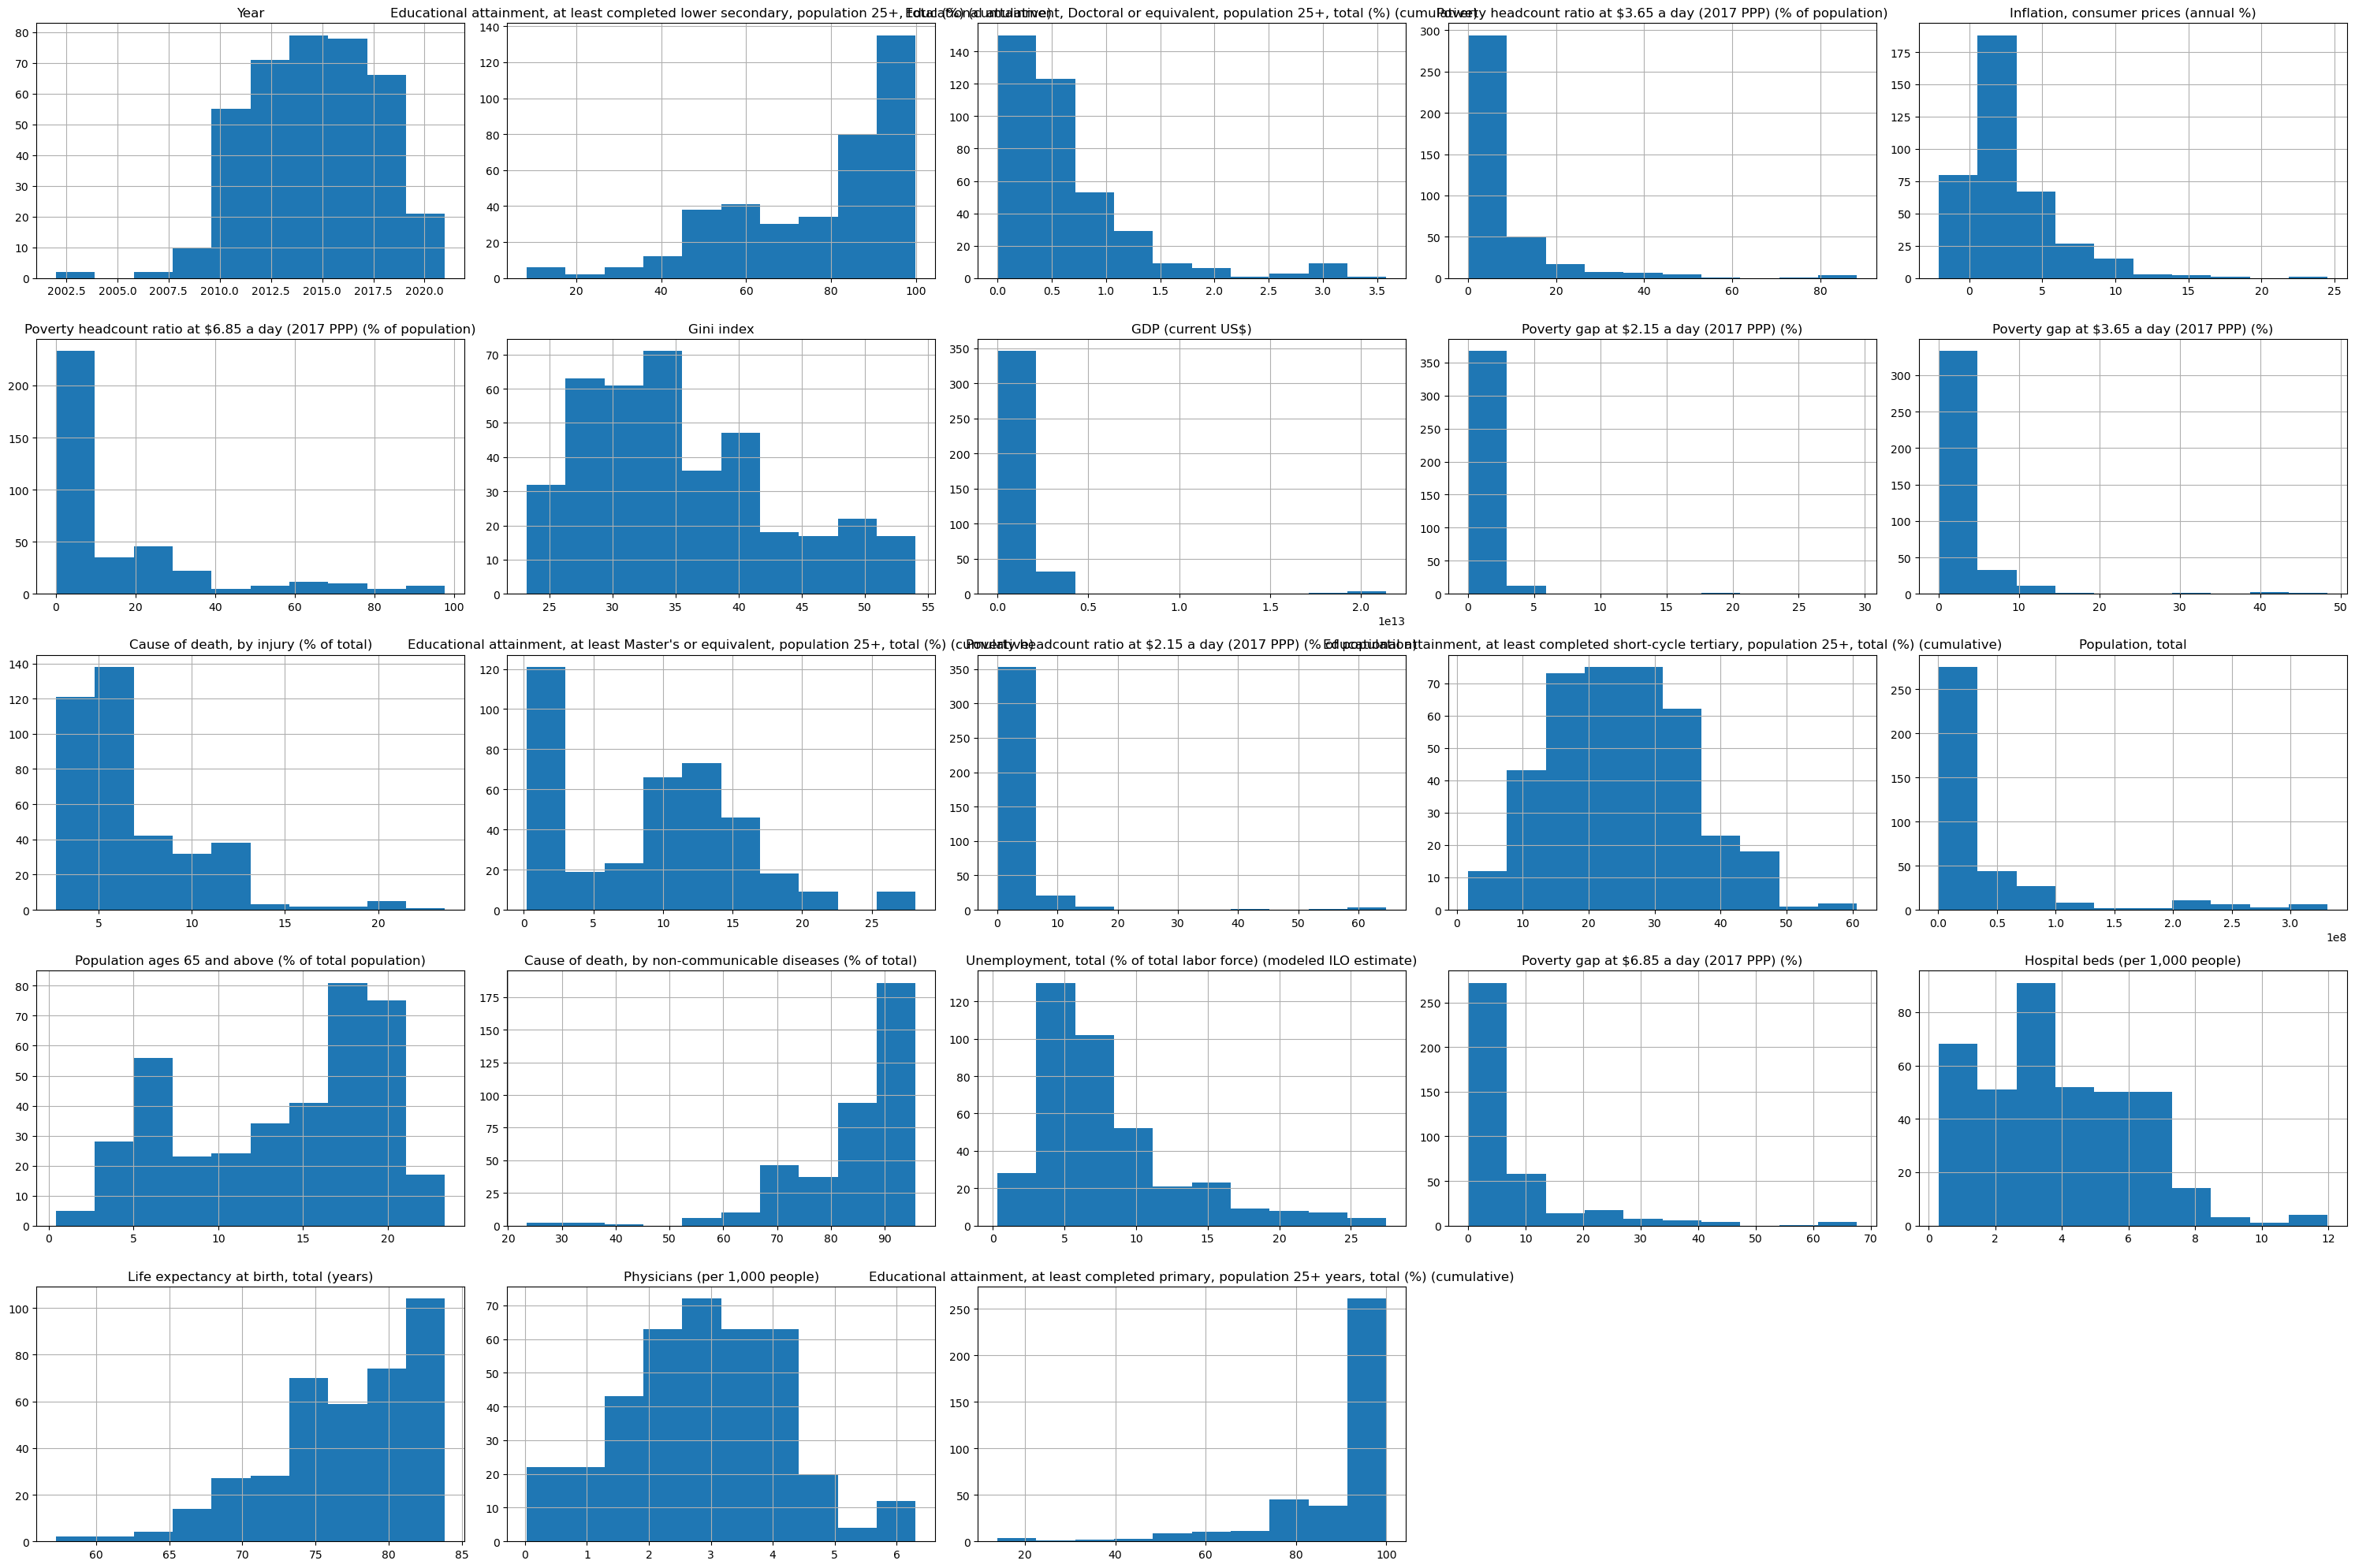

In [17]:

sample.hist(figsize=(30,20))   #Distribution of the final dataset
plt.tight_layout();
#plt.subplots_adjust(hspace=0.2);

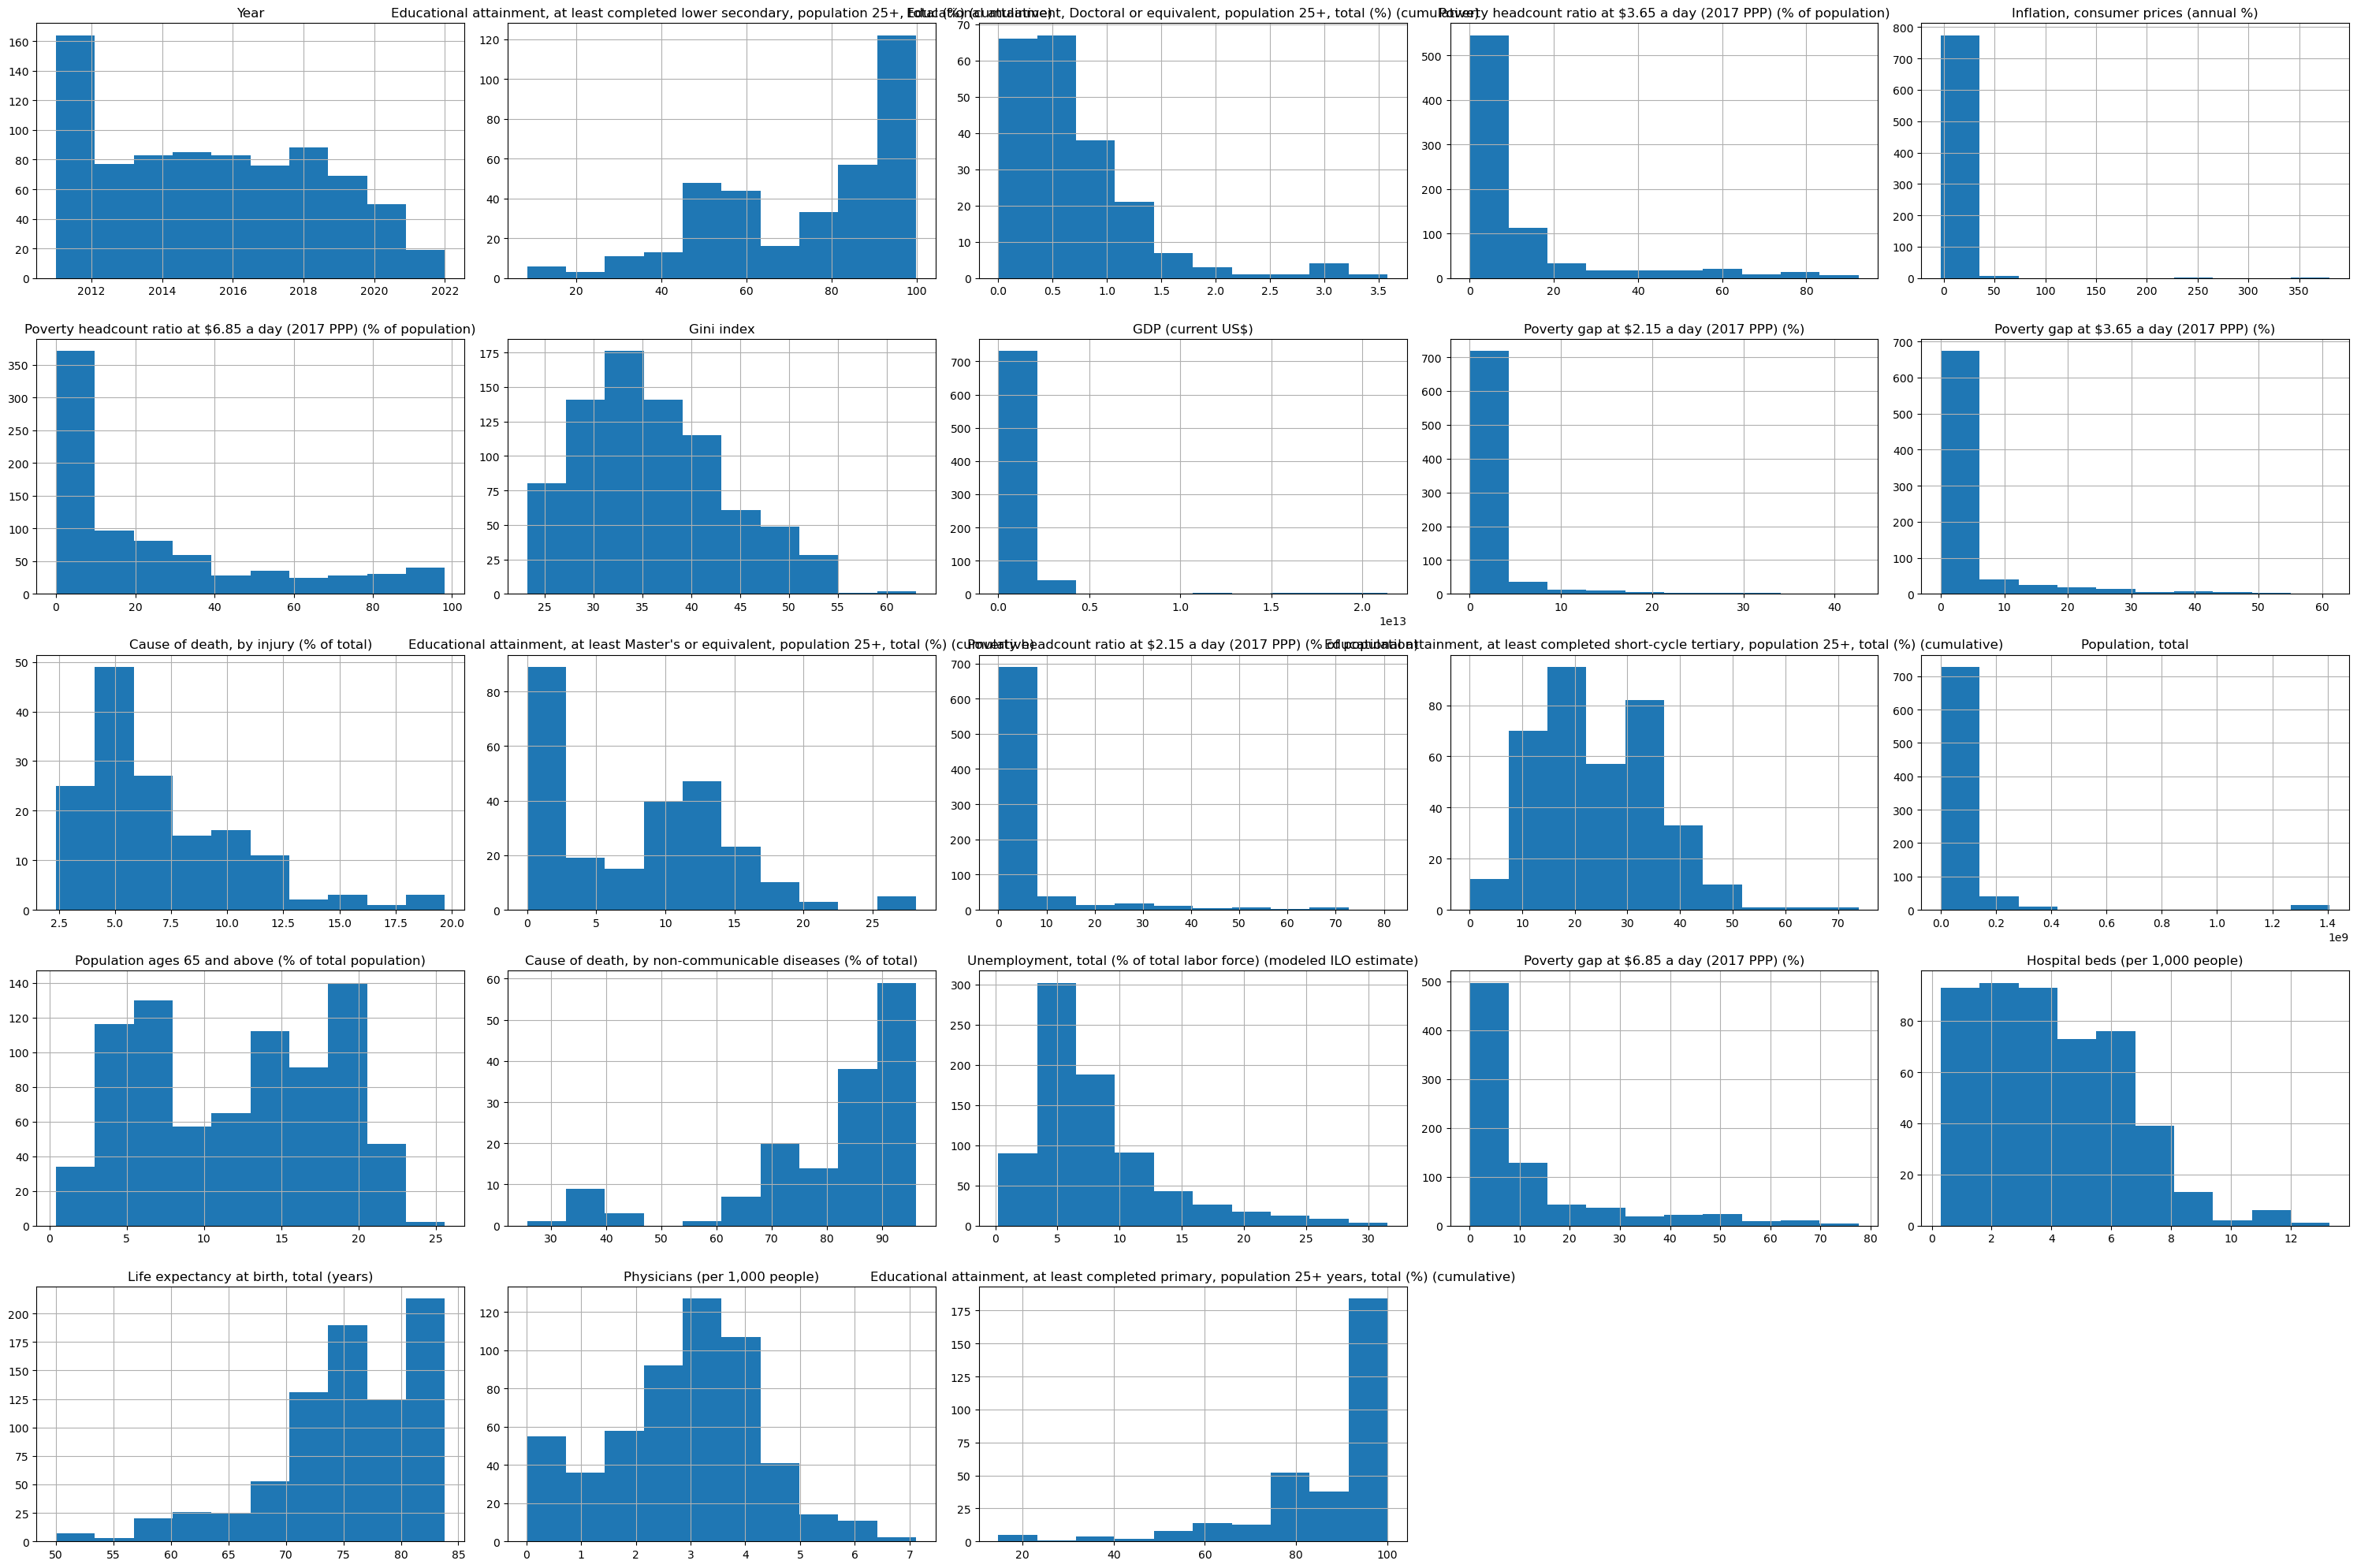

In [18]:
gini[(gini['Year'] > 2010) & (gini['Year'] < 2023) ].hist(figsize=(30,20)); # Distribution of the original dataset for those years
plt.tight_layout()

None of the distributions seem significantly different from the original dataset.

Inflation (1st row, 5th column) looks different but that's because The original dataset has one large outlier skewing the graph.

Speaking of outliers, some of the variables in our sample distribution look like they might have outliers but I'll leave them in for now as I plan to use more outlier robust models and those rows may have useful information. 


In [ ]:
profile = ProfileReport(sample)

profile.to_notebook_iframe()

1) What is my problem?
2) What metric can measure that model? 
3) How to split train/test data. How to tune model?

Read up on causal inference